In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the data from the CSV file
df = pd.read_csv('card_transdata.csv')

fraud_count = df[df['fraud'] != 0].shape[0]
print(f"Fraud Count {fraud_count}")

length_before = df.shape[0]
print(f"Length {length_before}")

df.tail()

Fraud Count 87403
Length 1000000


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [3]:
## drop duplicates

df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

length_after = df.shape[0]

print(f"The length before {length_before} length after {length_after}")

Duplicated values dropped succesfully
The length before 1000000 length after 1000000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(["fraud"], axis=1)
y = df["fraud"]

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

# normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=7))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation="relu"))
#model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

model.summary()

'''
model = tf.keras.Sequential(
    [
        # Adjusted number of neurons
        tf.keras.layers.Dense(128, activation="relu", input_shape=(X.shape[-1],),
                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate
        tf.keras.layers.Dense(64, activation="relu",
                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()
'''

/home/corey/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

'\nmodel = tf.keras.Sequential(\n    [\n        # Adjusted number of neurons\n        tf.keras.layers.Dense(128, activation="relu", input_shape=(X.shape[-1],),\n                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization\n        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate\n        tf.keras.layers.Dense(64, activation="relu",\n                              kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization\n        tf.keras.layers.Dropout(0.2),  # Adjusted dropout rate\n        tf.keras.layers.Dense(1, activation="sigmoid"),\n    ]\n)\nmodel.summary()\n'

In [13]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# configure early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# calculate class weights
neg, pos = np.bincount(y_train)
total = neg + pos
class_weight = {0: 1, 1: 5}

# train the model
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[es])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30)

Epoch 1/30
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9333 - loss: 0.1903 - val_accuracy: 0.9820 - val_loss: 0.0491
Epoch 2/30
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9834 - loss: 0.0452 - val_accuracy: 0.9874 - val_loss: 0.0358
Epoch 3/30
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9885 - loss: 0.0333 - val_accuracy: 0.9915 - val_loss: 0.0275
Epoch 4/30
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9921 - loss: 0.0257 - val_accuracy: 0.9940 - val_loss: 0.0225
Epoch 5/30
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9946 - loss: 0.0209 - val_accuracy: 0.9949 - val_loss: 0.0193
Epoch 6/30
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9956 - loss: 0.0181 - val_accuracy: 0.9959 - val_loss: 0.0172
Epoch 7/30
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9960 - loss: 0.0161 - val_accuracy: 0.9963 - val_loss: 0.0156
Epoch 8/30
14063/14063 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - accuracy: 

[]

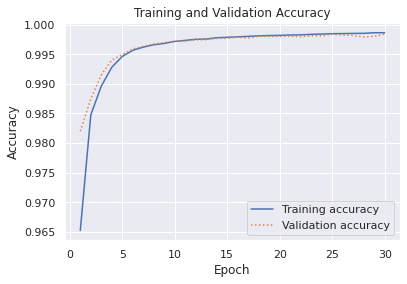

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


acc = history.history["accuracy"]
val = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 9s 721us/step


Text(89.18, 0.5, 'Actual label')

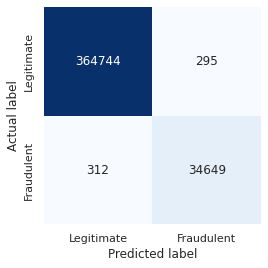

In [15]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

0.9984825%
